In [1]:
# Ideas for linear regression. 
# Time vs. Collision Rates
# Multiple regressions on one plot based on mode or county.
# Mileage vs. Collision Rates
# Mutliple regressions on one based on injury outcome.
# Time vs. Injury Total Per Collision

#Import dependencies
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


 
#Open filtered CSV file
traffic_injuries = Path("Resources/road-traffic-injuries-2002-2010.csv")

df = pd.read_csv(traffic_injuries)

# Read in the data. 
df



C:\Users\stlki\AppData\Local\Temp\ipykernel_13168\2578034368.py:19: DtypeWarning: Columns (0,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(traffic_injuries)


,ind_id,ind_definition,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,...,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters,version
0,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
1,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
2,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
3,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
4,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,12/17/13 13:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448945,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12/17/13 13:55
448946,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12/17/13 13:55
448947,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,12/17/13 13:55
448948,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,35237538.0,28.38,0.0,84.0,28.38,100.0,NaN,1.17,43.0,12/17/13 13:55


In [2]:
#clean data to remove null values and columns 
clean_df = df.drop(columns = ["ind_definition","version"])
clean_df = clean_df.drop(clean_df[clean_df['ind_id'] == "END OF TABLE"].index)
clean_df = clean_df.drop(columns = ["ind_id", 'LL95CI_avmtrate', 'UL95CI_avmtrate',
       'avmtrate_se', 'avmtrate_rse', 'CA_decile_avmt', 'CA_RR_avmtrate',
       'groupquarters','LL95CI_poprate', 'UL95CI_poprate',
       'poprate_se', 'poprate_rse', 'CA_decile_pop', 'CA_RR_poprate',
       'avmttotal', 'avmtrate'])
clean_df = clean_df[clean_df['severity'] != 'ND']
clean_df = clean_df[clean_df['mode'] != 'All modes']
clean_df = clean_df[~clean_df['reportyear'].isin(['2002-2004','2005-2007','2008-2010','2006-2010'])]

clean_df

,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,mode,severity,injuries,totalpop,poprate
2,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Bicyclist,Killed,7.0,2914663.0,0.24
3,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Bicyclist,Severe Injury,49.0,2914663.0,1.68
4,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Bus,Severe Injury,1.0,2914663.0,0.03
5,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Car/Pickup,Killed,130.0,2914663.0,4.46
6,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,Car/Pickup,Severe Injury,488.0,2914663.0,16.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448943,2010,PL,56518.0,Penn Valley CDP,Nevada,6057.0,Northeast Sierra,6.0,Motorcycle,Severe Injury,1.0,NaN,NaN
448944,2010,PL,56518.0,Penn Valley CDP,Nevada,6057.0,Northeast Sierra,6.0,Vehicles,Severe Injury,1.0,NaN,NaN
448946,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,Car/Pickup,Severe Injury,1.0,16180.0,6.18
448947,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,Pedestrian,Severe Injury,1.0,16180.0,6.18


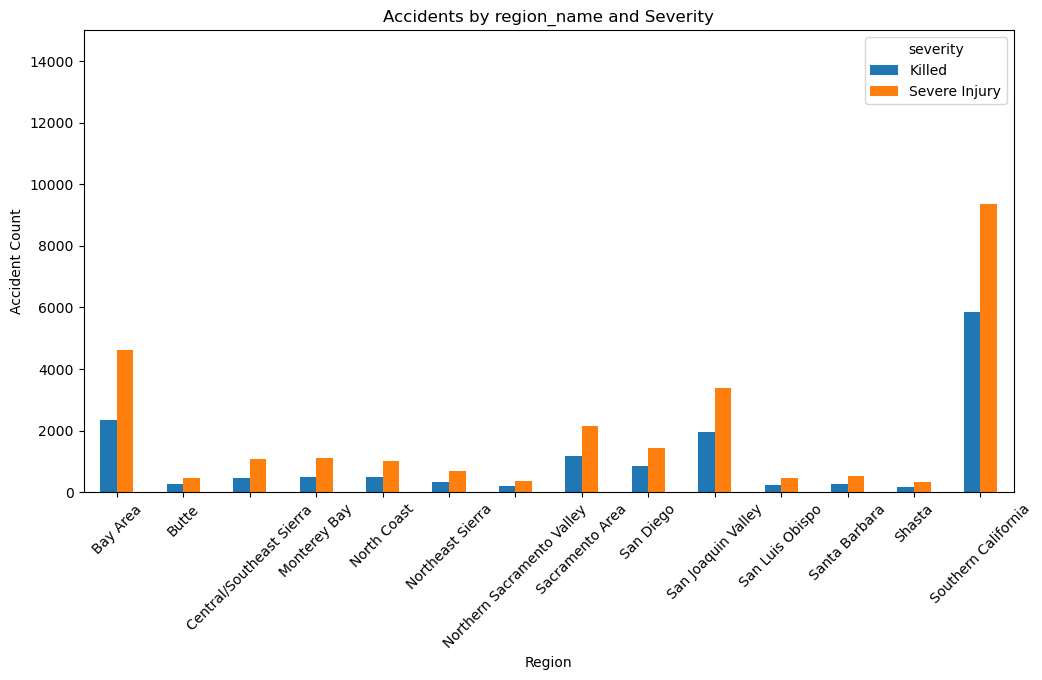

In [3]:
# Create a Bar chart- Accidents by Region and severity
yearwise_severity = clean_df.groupby(['region_name', 'severity']).size().reset_index(name='Accident Count')
pivot_data = yearwise_severity.pivot_table(index='region_name', columns='severity', values='Accident Count').sort_index(axis=1)
pivot_data.plot.bar(figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Accident Count')
plt.ylim(0, 15000)
plt.title('Accidents by region_name and Severity')
plt.xticks(rotation=45)
plt.show()

In [4]:
#calculating severity based on poprate and year

year_pop_severity = clean_df.groupby(['reportyear', 'severity'])['poprate'].sum().reset_index()
year_pop_severity = year_pop_severity[year_pop_severity["severity"] != "ND"]
yearwise_killed = year_pop_severity[year_pop_severity["severity"] == "Killed"]
yearwise_injured = year_pop_severity[year_pop_severity["severity"] == "Severe Injury"]
yps_total = pd.merge(yearwise_killed, yearwise_injured, how = "outer", on = ["reportyear"])

# Drop columns severity_x and severity_y
yps_total.drop(columns=["severity_x", "severity_y"], inplace=True)

# Rename columns poprate_x and poprate_y
yps_total.rename(columns={"poprate_x": "Killed Population Ratio", "poprate_y": "Severe Injury Population Ratio"}, inplace=True)
yps_total.set_index('reportyear', inplace=True)
yps_total

yps_total

,Killed Population Ratio,Severe Injury Population Ratio
reportyear,,
2002,13395.07,49415.22
2003,14793.82,47112.90
2004,18803.16,62506.76
2005,21036.95,49869.85
2006,15022.71,56694.94
2007,13540.93,50288.81
2008,12873.08,42286.48
2009,14819.58,42719.06
2010,20619.80,48604.76


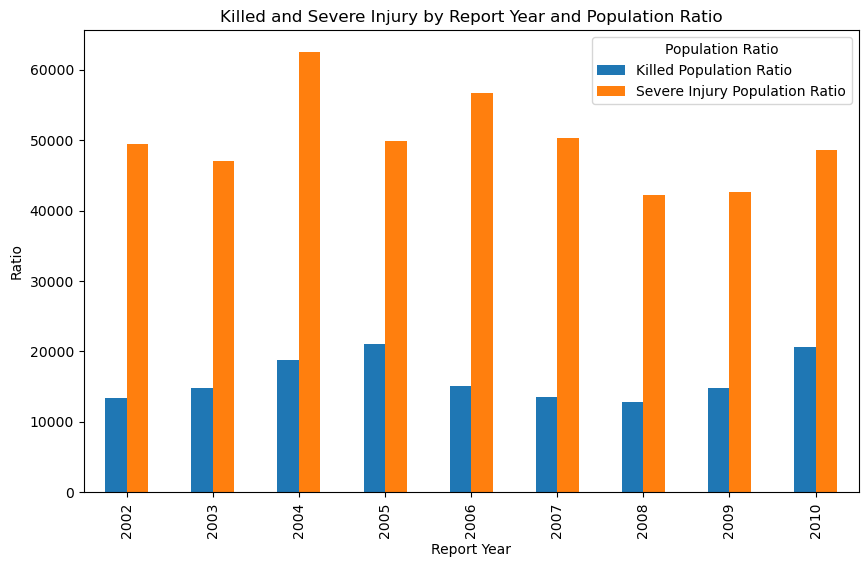

In [5]:
yps_total.plot(kind='bar', figsize=(10, 6))
plt.title('Killed and Severe Injury by Report Year and Population Ratio')
plt.xlabel('Report Year')
plt.ylabel('Ratio')
plt.legend(title='Population Ratio')
plt.xticks(range(len(yps_total.index)), yps_total.index)
#plt.savefig("Charts/injuries_year_severity_popratio.png")
plt.show()
#Add Charts to DATA folde

In [22]:
# Calculating severity based on poprate and region.
region_pop_severity = clean_df.groupby(['region_name', 'severity'])['poprate'].sum().reset_index()
region_pop_severity = region_pop_severity[region_pop_severity["severity"] != "ND"]
regionwise_killed = region_pop_severity[region_pop_severity["severity"] == "Killed"]
regionwise_injured = region_pop_severity[region_pop_severity["severity"] == "Severe Injury"]
rps_total = pd.merge(regionwise_killed, regionwise_injured, how = "outer", on = ["region_name"])

# Drop columns severity_x and severity_y
rps_total.drop(columns=["severity_x", "severity_y"], inplace=True)

# Rename columns poprate_x and poprate_y
rps_total.rename(columns={"poprate_x": "Killed Population Ratio", "poprate_y": "Severe Injury Population Ratio"}, inplace=True)
rps_total.set_index('region_name', inplace=True)

rps_total

,Killed Population Ratio,Severe Injury Population Ratio
region_name,,
Bay Area,10088.73,42282.31
Butte,1216.20,4038.58
Central/Southeast Sierra,9142.90,36363.51
Monterey Bay,1891.91,14118.57
North Coast,3928.68,13874.42
Northeast Sierra,5314.66,19258.41
Northern Sacramento Valley,3320.55,11934.52
Sacramento Area,3814.96,15594.46
San Diego,2123.42,9919.10


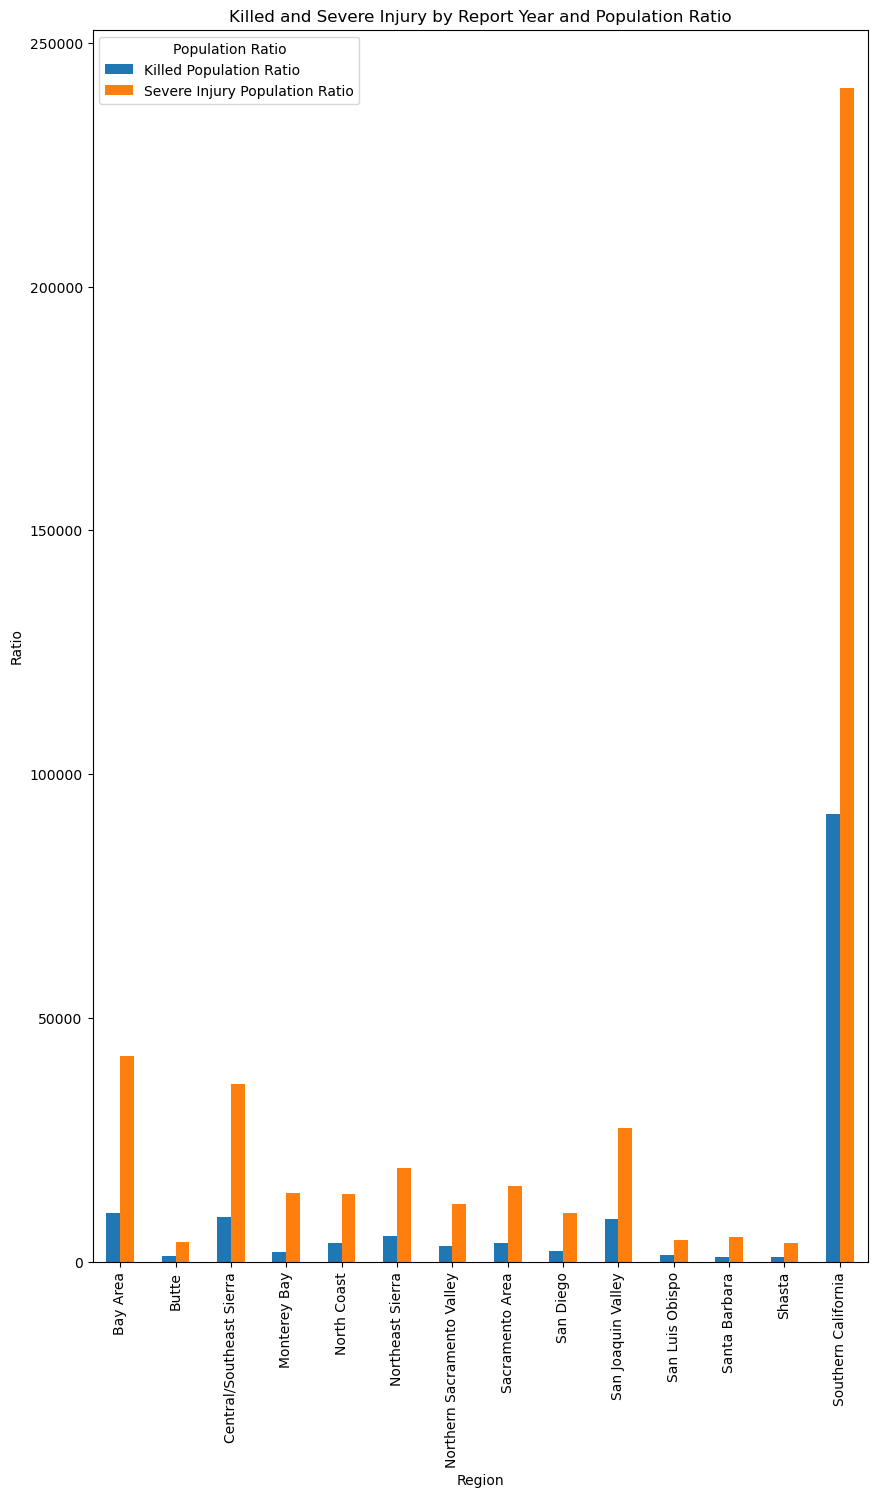

In [31]:
# Create double bar graph of population rate injuries by severity by region.
rps_total.plot(kind='bar', figsize=(10, 16))
plt.title('Killed and Severe Injury by Report Year and Population Ratio')
plt.xlabel('Region')
plt.ylabel('Ratio')
plt.legend(title='Population Ratio')
plt.xticks(range(len(rps_total.index)), rps_total.index)
plt.savefig("Charts\\injuries_region_severity_popratio.png")
plt.show()
#Add Charts to DATA folder

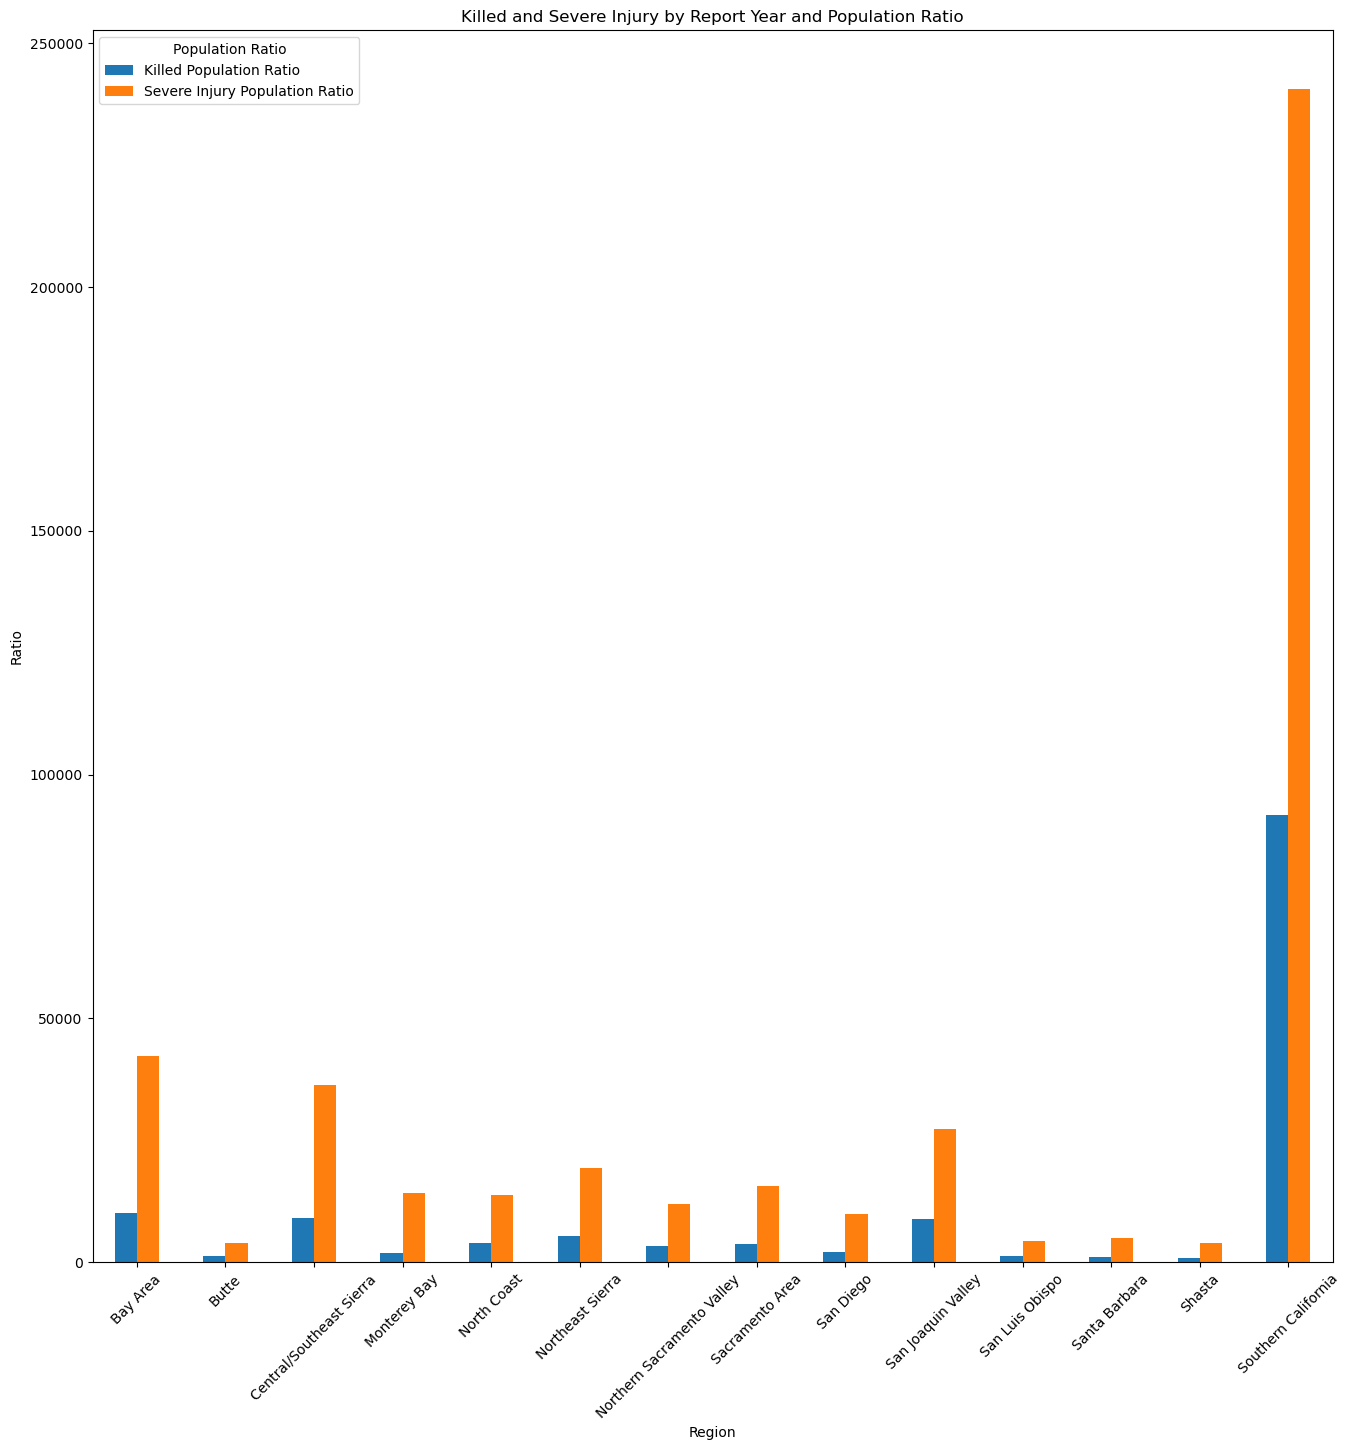

In [43]:
# Create double bar graph of population rate injuries by severity by region.
rps_total.plot(kind='bar', figsize=(16, 16))
plt.title('Killed and Severe Injury by Report Year and Population Ratio')
plt.xlabel('Region')
plt.ylabel('Ratio')
plt.legend(title='Population Ratio')
plt.xticks(range(len(rps_total.index)), rps_total.index, rotation = 45)
plt.savefig("Charts\\injuries_region_severity_popratio.png")
plt.show()
#Add Charts to DATA folder